# 作品六：限制條件下之多變量函數參數估計與模擬

### 學號 : 411072054 <br> 姓名 : 黃暐宸

## 作品目標：<br> 
本作品分成兩個習題，習題一是混合常態參數估計，習題二是限制式條件的最大值問題 Constraint optimization

1. 混合常態參數估計:<br> 
(1)設定兩種混合常態分佈的參數，觀察兩種情況下($\mu_1, \mu_2$ 較接近和較遠)的效果差異。<br> 
(2)使用最大概似估計（MLE）推導成可程式化的函數。<br> 
(3)生成不同大小的模擬樣本，利用 scipy.optimize.minimize 進行最大概似估計。<br> 
(4)觀察隨著樣本大小增加，估計結果是否更接近真實分佈。<br> 
(5)加入 GaussianMixture 的 EM 演算法進行比較，評估估計的穩定性和效果。<br> 
(6)目的是通過模擬實驗，探討在混合常態分佈情境下，最大概似估計（MLE）的效果如何隨著樣本大小的變化而改變。

2. 限制式條件的最大值問題:<br> 
(1)利用推導到精簡的目標函數，使用最大概似估計的方式擬合 alpha 和 beta 參數。<br> 
(2)透過設定初始猜測值和參數範圍，計算目標函數在不同參數組合下的值。<br> 
(3)使用等高線圖和三維表面圖可視化目標函數在參數空間中的變化。<br> 
(4)最後，利用 minimize 函數估計出的最大概似估計參數，並標記在圖上。<br> 
(5)目的是理解最大概似估計在參數空間中的優化過程和如何找出最大概似估計參數。

### 作品需要用到的模組


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.mixture import GaussianMixture
import scipy.optimize as opt
from scipy.stats import norm, binom
from scipy.optimize import minimize
import warnings
import pandas as pd

## 習題 1：混合常態參數估計 Normal Mixture


### 一.自行設定資料生成的參數 $\Omega=\{\pi_1,\mu_1,\sigma_1^2, \mu_2,\sigma_2^2\}$，設計兩組情況：
一組之 $\mu_1, \mu_2$ 較接近（視覺上好像只有一組），另一組分開較遠些（視覺上看出兩個常態混合），兩組參數 :<br><br>
較近的情況 :<br>
pi1_close, mu1_close, sigma1_close, mu2_close, sigma2_close = 0.5, 70, 10, 75, 8<br><br>
較遠的情況 :<br>
pi1_far, mu1_far, sigma1_far, mu2_far, sigma2_far = 0.5, 60, 10, 90, 8<br><br>
這樣的混合分佈可以用來模擬兩組考試分數的不同情況，例如一組考試難度較接近，另一組考試難度較分散。這裡的機率密度函數（PDF）可視為對應於不同情況下考試分數的分佈情況。<br>
1. 定義混合分佈的機率密度函數 (PDF)： 
f_close 和 f_far 分別是較接近和分開較遠情況下的混合分佈的 PDF 函數。這裡使用了正態分佈（normal distribution）的機率密度函數。
2. 生成 x 值範圍：
x = np.linspace(0, 100, 1000) 生成 0 到 100 之間的 1000 個均勻分布的數字，這將用於繪製 PDF 圖表。
繪製混合分佈的 PDF 圖表：

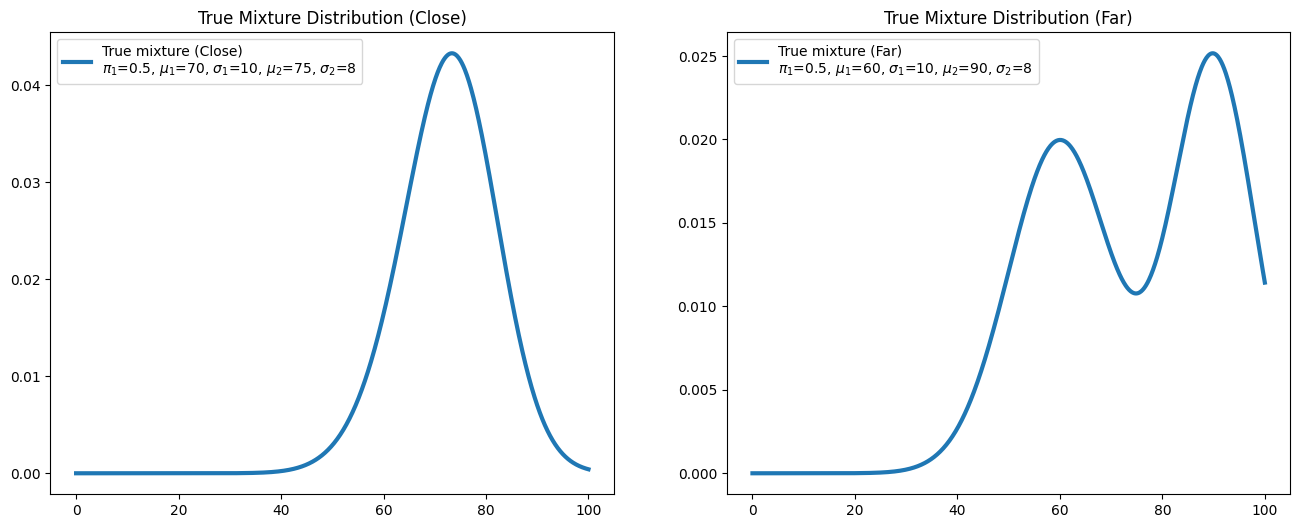

In [15]:

# 設定參數 --------------
# 較接近的情況
pi1_close, mu1_close, sigma1_close, mu2_close, sigma2_close = 0.5, 70, 10, 75, 8
# 分開較遠的情況
pi1_far, mu1_far, sigma1_far, mu2_far, sigma2_far = 0.5, 60, 10, 90, 8

# 繪製混合分佈pdf ---------------
f_close = lambda x: pi1_close * norm.pdf(x, mu1_close, sigma1_close) + (1 - pi1_close) * norm.pdf(x, mu2_close, sigma2_close)
f_far = lambda x: pi1_far * norm.pdf(x, mu1_far, sigma1_far) + (1 - pi1_far) * norm.pdf(x, mu2_far, sigma2_far)

x = np.linspace(0, 100, 1000)  # 修改 x 的範圍以適應考試分數的範圍

# 設定 subplot
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# 繪製母體的混合 pdf (較接近的情況)
axs[0].plot(x, f_close(x), linestyle='-', linewidth=3, label=f'True mixture (Close)\n$\\pi_1$={pi1_close}, $\\mu_1$={mu1_close}, $\\sigma_1$={sigma1_close}, $\\mu_2$={mu2_close}, $\\sigma_2$={sigma2_close}')
axs[0].legend()
axs[0].set_title('True Mixture Distribution (Close)')

# 繪製母體的混合 pdf (分開較遠的情況)
axs[1].plot(x, f_far(x), linestyle='-', linewidth=3, label=f'True mixture (Far)\n$\\pi_1$={pi1_far}, $\\mu_1$={mu1_far}, $\\sigma_1$={sigma1_far}, $\\mu_2$={mu2_far}, $\\sigma_2$={sigma2_far}')
axs[1].legend()
axs[1].set_title('True Mixture Distribution (Far)')

plt.show()


結果：
1. 較接近的情況 (Close)：

在這種情況下，兩個正態分佈的中心較接近，標準差也較小。這導致混合分佈呈現較單一且較集中的形狀。
圖表顯示，兩個分佈的重疊部分較大，整體混合分佈的形狀相對平緩。

2. 分開較遠的情況 (Far)：

在這種情況下，兩個正態分佈的中心較遠，標準差較大。這導致混合分佈呈現較寬廣且兩峰分明的形狀。
圖表顯示，兩個分佈的重疊部分較小，整體混合分佈的形狀相對銳利。

### 二. 推導估計的MLE函數成可程式化的階段
想從x1,x2....，估計母體參數$\Omega$，使用MLE估計，即聯合概似函數，如下:<br><br>
$\max_{\Omega} \Pi_{i=1}^{N}  (\pi_1 f(x_i|\mu_1,\sigma_1^2) + \pi_2 f(x_i|\mu_2,\sigma_2^2))$<br>
${\Omega=\{\pi_1, \pi_2,\mu_1,\sigma_1^2, \mu_2,\sigma_2^2| \pi_1+\pi_2=1, \pi_1, \pi_2, \sigma_1^2, \sigma_2^2>0\}}$<br><br>
把聯合概似函數抽出來，因為這樣不易計算，且當n很大時，概似函數值都很小，在連乘會更難計算，因此加log，把連乘變成連加。<br><br>
$L(\Omega)=\ln\Pi_{i=1}^{N}  (\pi_1 f(x_i|\mu_1,\sigma_1^2) + \pi_2 f(x_i|\mu_2,\sigma_2^2))$

$=\sum_{i=1}^{N} \ln (\pi_1 f(x_i|\mu_1,\sigma_1^2) + \pi_2 f(x_i|\mu_2,\sigma_2^2))f(x|\mu,\sigma^2)$<br><br>
所以問題變成計算多變量限制式(條件)最大值的參數估計:<br><br>
$\max_{\Omega=\{\pi_1, \pi_2,\mu_1,\sigma_1^2, \mu_2,\sigma_2^2| \pi_1+\pi_2=1, \pi_1, \pi_2, \sigma_1^2, \sigma_2^2>0\}} L(\Omega)$<br><br>
$L(\Omega)=\sum_{i=1}^{N} \ln (\pi_1 f(x_i|\mu_1,\sigma_1^2) + \pi_2 f(x_i|\mu_2,\sigma_2^2))f(x|\mu,\sigma^2)$

這時樣本資料、目標函數、限制條件都到位，可以開始寫程式。

程式碼解釋(設定參數：
pi1, mu1, sigma1, mu2, sigma2 = 0.5, 70, 10, 75, 8):<br>
1. 生成模擬樣本：
生成多個不同大小的模擬樣本（n_values 中的不同 n 值），其中每個樣本的大小由二項分佈生成。
進行最大概似估計：
對每個模擬樣本進行最大概似估計，估計混合分佈的參數。
初始估計為 x0 = [0.5, 70, 10, 75, 8]，設定了估計參數的邊界 bnds。
添加了等式約束 cons，以確保混合分佈的權重之和為 1。
2. 進行最大概似估計：
對每個模擬樣本進行最大概似估計，估計混合分佈的參數。
初始估計為 x0 = [0.5, 60, 10, 85, 10] ，提供優化算法一個起點，以便能夠開始搜尋概似函數的最大值。並設定了估計參數的邊界 bnds。
添加了等式約束 cons，以確保混合分佈的權重之和為 1。
3. 這樣的模擬實驗可以用來觀察隨著樣本大小的增加，最大概似估計是否能夠更準確地逼近真實混合分佈。程式碼中使用了 scipy.optimize.minimize 進行最大概似估計，而模擬樣本的大小則從小到大變化，提供了不同估計結果的比較。


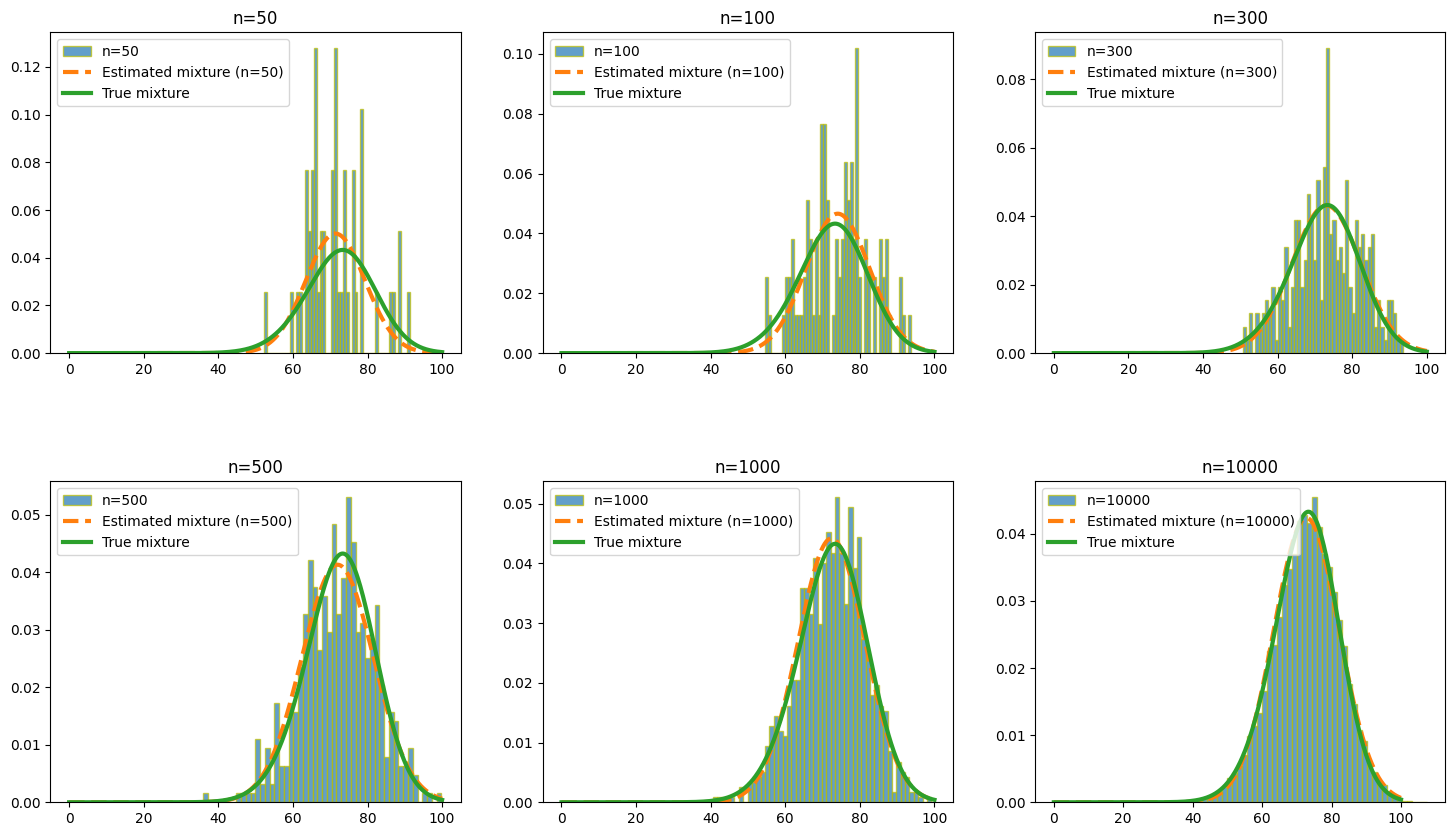

In [3]:
# 禁用所有警告
warnings.filterwarnings("ignore")
# 設定參數 --------------
pi1, mu1, sigma1, mu2, sigma2 = 0.5, 70, 10, 75, 8
# 繪製混合分佈pdf ---------------
f = lambda x: pi1 * norm.pdf(x, mu1, sigma1) + (1 - pi1) * norm.pdf(x, mu2, sigma2)
x = np.linspace(0, 100, 1000)  # 修改 x 的範圍以適應考試分數的範圍

# 生成模擬樣本 -------
n_values = [50, 100, 300, 500, 1000, 10000]

# 設定subplot
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
fig.subplots_adjust(hspace=0.4)

opts = dict(disp=True, maxiter=1e4)

# 迭代生成圖
for i, n_val in enumerate(n_values):
    # 生成模擬樣本
    n_i = n_val
    sample_i = np.concatenate([np.random.normal(mu1, sigma1, int(n_i * pi1)),
                               np.random.normal(mu2, sigma2, int(n_i * (1 - pi1)))])

    # subplot
    row = i // 3
    col = i % 3
    axs[row, col].hist(sample_i, 50, edgecolor='y', density=True, alpha=0.7, label=f'n={n_val}')

    # 最大概似估計
    x0 = [0.5, 60, 10, 85, 10]  # 初始猜測值

    bnds = [(0, 1), (0, 100), (0, np.inf), (0, 100), (0, np.inf)]  # 修改邊界以適應考試分數的範圍
    cons = {'type': 'eq', 'fun': lambda x: np.sum(x[:2]) - 1}

    L_i = lambda x: -np.sum(np.log(x[0] * norm.pdf(sample_i, x[1], x[2]) + (1 - x[0]) * norm.pdf(sample_i, x[3], x[4])))
    res_i = opt.minimize(L_i, x0=x0,
                         bounds=bnds,
                         constraints=cons,
                         options={'disp': False},
                         tol=1e-8)

    # 繪製估計的混合pdf
    f_hat_i = lambda x: res_i.x[0] * norm.pdf(x, res_i.x[1], res_i.x[2]) + (1 - res_i.x[0]) * norm.pdf(x, res_i.x[3], res_i.x[4])
    axs[row, col].plot(x, f_hat_i(x), linestyle='--', linewidth=3, label=f'Estimated mixture (n={n_val})')

    # 繪製真實混合pdf
    axs[row, col].plot(x, f(x), linestyle='-', linewidth=3, label='True mixture')

    axs[row, col].legend()
    axs[row, col].set_title(f'n={n_val}')

plt.show()


結果：
1. 直方圖：
每個子圖的直方圖表示對應模擬樣本的分佈情況。隨著樣本數的增加，直方圖更加平滑且更接近真實分佈。

2. 真實混合分佈：
每個子圖上的實線表示真實混合分佈。這是程式執行前在設定參數中指定的混合分佈，可與直方圖估計混合分佈作比對。

3. 估計混合分佈：
每個子圖上的虛線表示使用最大概似估計獲得的混合分佈。隨著樣本數的增加，結果更接近真實分佈。
(1)n=50：估計混合分佈pdf與真實混合分佈相差甚遠，原因是初始估計值選得不好。
(2) n=100, 300, ... 10000：隨著樣本數的增加，估計混合分佈pdf逐漸逼近真實混合分布，直到n=10000，兩者幾乎重疊。樣本數增加有助於提高估計的穩定性和準確性，使得估計結果更能反映真實情況。

總體而言，這個模擬實驗呈現了樣本數對混合分佈估計的影響，特別是在樣本數較小時初始估計的重要性。修正初始估計值的選擇可能有助於提升估計的準確性。

### 三. 程式設定與前者相同，加入 sklearn.mixture.GaussianMixture 的 EM 演算法做比較

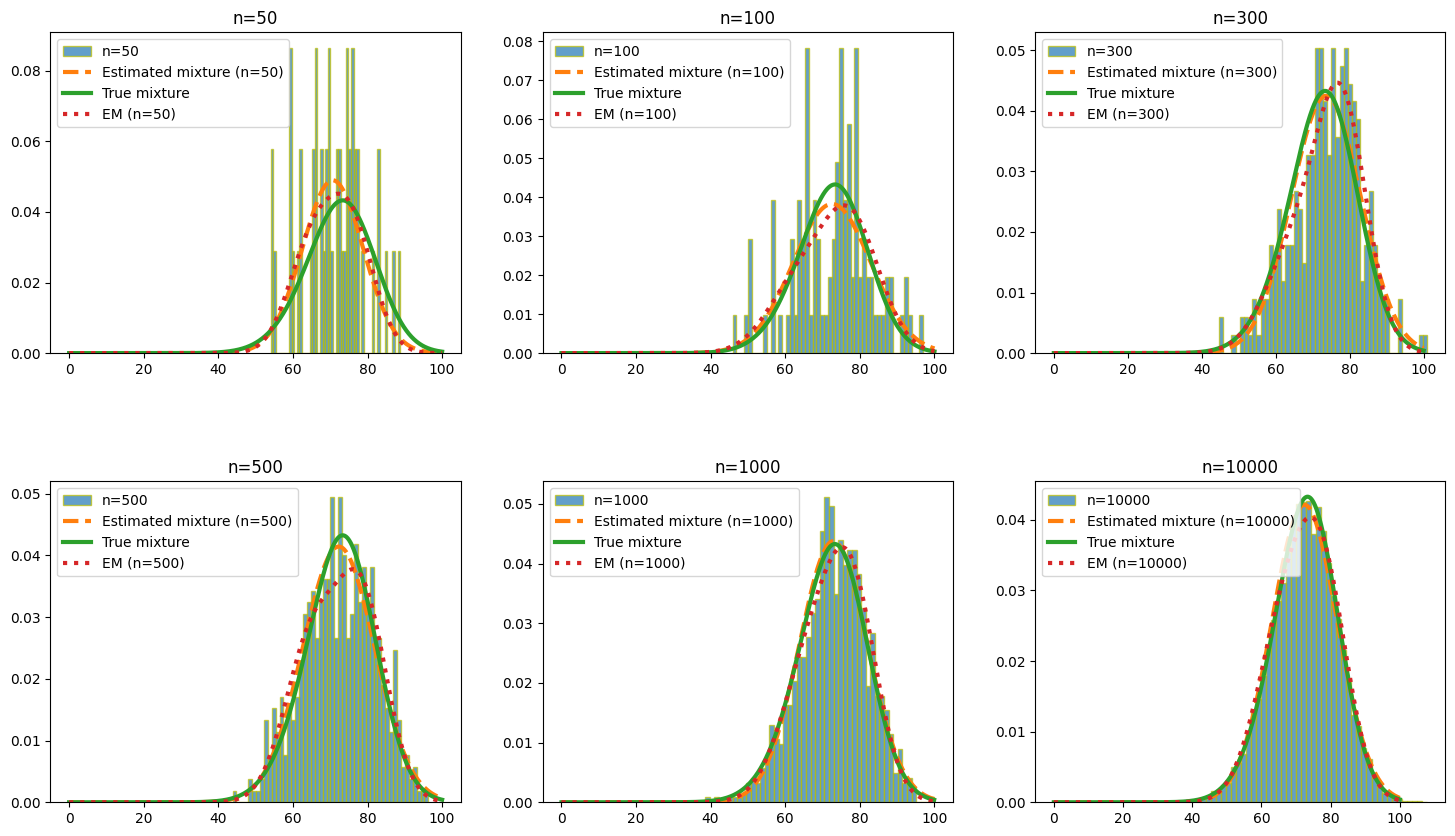

In [42]:
# 禁用所有警告
warnings.filterwarnings("ignore")
# 設定參數 --------------
pi1, mu1, sigma1, mu2, sigma2 = 0.5, 70, 10, 75, 8
# 繪製混合分佈pdf ---------------
f = lambda x: pi1 * norm.pdf(x, mu1, sigma1) + (1 - pi1) * norm.pdf(x, mu2, sigma2)
x = np.linspace(0, 100, 1000)  # 修改 x 的範圍以適應考試分數的範圍

# 生成模擬樣本 -------
n_values = [50, 100, 300, 500, 1000, 10000]

# 設定subplot
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
fig.subplots_adjust(hspace=0.4)

# 迭代生成圖
for i, n_val in enumerate(n_values):
    # 生成模擬樣本
    n_i = n_val
    sample_i = np.concatenate([np.random.normal(mu1, sigma1, int(n_i * pi1)),
                               np.random.normal(mu2, sigma2, int(n_i * (1 - pi1)))])
    
    # subplot
    row = i // 3
    col = i % 3
    axs[row, col].hist(sample_i, 50, edgecolor='y', density=True, alpha=0.7, label=f'n={n_val}')

    # 最大概似估計
    x0 = [0.5, 60, 10, 85, 10]  # 初始猜測值
    bnds = [(0, 1), (0, 100), (0, np.inf), (0, 100), (0, np.inf)]  # 修改邊界以適應考試分數的範圍
    cons = {'type': 'eq', 'fun': lambda x: np.sum(x[:2]) - 1}
    
    L_i = lambda x: -np.sum(np.log(x[0] * norm.pdf(sample_i, x[1], x[2]) + (1 - x[0]) * norm.pdf(sample_i, x[3], x[4])))
    res_i = opt.minimize(L_i, x0=x0,
                         bounds=bnds,
                         constraints=cons,
                         options={'disp': False},
                         tol=1e-8)

    # 繪製估計的混合pdf
    f_hat_i = lambda x: res_i.x[0] * norm.pdf(x, res_i.x[1], res_i.x[2]) + (1 - res_i.x[0]) * norm.pdf(x, res_i.x[3], res_i.x[4])
    axs[row, col].plot(x, f_hat_i(x), linestyle='--', linewidth=3, label=f'Estimated mixture (n={n_val})')

    # 繪製真實混合pdf
    axs[row, col].plot(x, f(x), linestyle='-', linewidth=3, label='True mixture')
    
    # 使用EM演算法進行混合分佈估計
    gmm = GaussianMixture(n_components=2, max_iter=1000)
    gmm.fit(sample_i.reshape(-1, 1))
    gmm_pdf = lambda x: np.exp(gmm.score_samples(x.reshape(-1, 1)))

    # 繪製EM演算法估計的混合pdf
    axs[row, col].plot(x, gmm_pdf(x), linestyle=':', linewidth=3, label=f'EM (n={n_val})')

    axs[row, col].legend()
    axs[row, col].set_title(f'n={n_val}')

plt.show()


結果：<br>
EM 演算法估計的混合 pdf 也會隨著樣本數增加逼近真實分布的pdf，但最後n=10000時，估計的混合pdf稍微比EM 演算法估計的混合 pdf更接近真實分布的pdf，這樣的結果可能是由於 EM 演算法在處理不同樣本數時，受到數據的影響以及模型的複雜度所導致的。

### 四.使用 optimize.minimize 與 GaussianMixture 分別估計的參數值

In [58]:
# 禁用所有警告
import warnings
warnings.filterwarnings("ignore")

# 設定參數 --------------
pi1, mu1, sigma1, mu2, sigma2 = 0.5, 70, 10, 75, 8

# 生成模擬樣本 -------
n_values = [50, 100, 300, 500, 1000, 10000]

# 建立 DataFrame 來存放結果
results_optimize = pd.DataFrame(columns=['n', 'pi1', 'pi2', 'mu1', 's1', 'mu2', 's2'])
results_gmm = pd.DataFrame(columns=['n', 'pi1', 'pi2', 'mu1', 's1', 'mu2', 's2'])

# 迭代生成圖
for n_val in n_values:
    # 生成模擬樣本
    n_i = n_val
    n1_i = binom.rvs(n_i, pi1)
    n2_i = n_i - n1_i
    sample_i = np.r_[norm.rvs(mu1, sigma1, size=n1_i),
                    norm.rvs(mu2, sigma2, size=n2_i)]

    # 最大概似估計
    pi1_hat = n1_i / n_i
    mu1_hat = np.mean(sample_i[:n1_i])
    sigma1_hat = np.std(sample_i[:n1_i])
    mu2_hat = np.mean(sample_i[n1_i:])
    sigma2_hat = np.std(sample_i[n1_i:])

    # 存儲結果
    results_optimize = pd.concat([results_optimize, pd.DataFrame({
        'n': [n_val],
        'pi1': [pi1_hat],
        'pi2': [1 - pi1_hat],
        'mu1': [mu1_hat],
        's1': [sigma1_hat],
        'mu2': [mu2_hat],
        's2': [sigma2_hat]
    })], ignore_index=True)

    # 使用 GaussianMixture
    gmm = GaussianMixture(n_components=2, max_iter=1000, tol=1e-8)
    gmm.fit(sample_i.reshape(-1, 1))

    # 存儲結果
    results_gmm = pd.concat([results_gmm, pd.DataFrame({
        'n': [n_val],
        'pi1': [gmm.weights_[0]],
        'pi2': [gmm.weights_[1]],
        'mu1': [gmm.means_[0][0]],
        's1': [np.sqrt(gmm.covariances_[0][0])[0]],
        'mu2': [gmm.means_[1][0]],
        's2': [np.sqrt(gmm.covariances_[1][0])[0]]
    })], ignore_index=True)

# 顯示結果
print("optimize.minimize (esimate)")
results_optimize_rounded = results_optimize.round(2)
print(results_optimize_rounded.to_string(index=False))

print("\nGaussianMixture")
results_gmm_rounded = results_gmm.round(2)
print(results_gmm_rounded.to_string(index=False))


optimize.minimize (esimate)
    n  pi1  pi2   mu1    s1   mu2   s2
   50 0.44 0.56 66.91  8.39 72.86 6.41
  100 0.55 0.45 70.14  9.98 74.09 7.17
  300 0.47 0.53 70.43  8.91 75.32 7.87
  500 0.51 0.49 69.89  9.88 75.10 8.00
 1000 0.50 0.50 70.00 10.10 75.25 7.62
10000 0.51 0.49 69.84  9.93 75.04 8.02

GaussianMixture
    n  pi1  pi2   mu1    s1   mu2   s2
   50 0.43 0.57 63.53  6.35 75.37 4.37
  100 0.35 0.65 71.45 12.48 72.17 6.45
  300 0.09 0.91 59.70  3.98 74.25 7.98
  500 0.07 0.93 85.49  3.44 71.50 8.95
 1000 0.58 0.42 75.72  8.35 68.37 8.91
10000 0.44 0.56 68.35  9.30 75.58 8.19


結果:<br>
這兩組結果都是估計混合分佈的參數，分別使用了不同的方法。其中，pi1 和 pi2 是混合分佈中每個分量的權重，mu1 和 mu2 是平均值，s1 和 s2 是標準差。這些值反映了估計的混合分佈在不同樣本大小下的變化。透過表格的方式數據化圖的值，具體展現 optimize.minimize 和 GaussianMixture 兩種估計方法的差別。


# 習題 2：限制式條件的最大值問題 Constraint optimization


### 計算下列最大概似估計 MLE 問題的參數 $\alpha$, $\beta$：

### $\displaystyle\max_{\alpha,\beta > 0} \ln L(\alpha,\beta)$

### 其中的聯合概似函數為 

### $L(\alpha,\beta)=\prod_{i=1}^n f_t(v_i |\alpha,\beta)F_T(u_i|\alpha,\beta)^{-1}$

### where $f_t(v|\alpha,\beta)=\alpha\beta v^{\beta-1}exp(-\alpha v^{\beta})$

### $F_T(u|\alpha,\beta)=1-exp(-\alpha u^{\beta})$

### 一.下載資料檔，取出資料並觀察資料的樣子

In [1]:

data_dir = 'C:/Users/wesley/OneDrive/文件/統計計算/data/'
u, v = np.loadtxt(data_dir + 'UV.txt', comments='%').T
n = len(u)
print(u, v, n)

[0.7682156 0.8767442 1.2123116 3.4094091 1.0629694 0.4495693 0.8789534
 0.6466784 0.3152598 0.5008881 0.2004936 0.4695486 0.9414701 0.9609428
 0.5703689 0.2729225 0.2284058 0.516521  1.1285071 1.5779443 0.3060923
 0.154763  1.0372218 1.0824315 0.4391443 0.832555  0.4211078 0.5457312
 0.4095959 0.6876466 1.8342681 1.8431507 1.5730947 1.0111777 1.4417695
 1.7207421 0.772964  0.5430361 1.5014328 0.7931465 0.1639931 1.7345422
 0.6726345 1.5337026 1.2249964 1.1644411 0.2759018 0.3922483 0.8182332
 0.5217467 0.3041502 0.4617526 0.9533329 0.4288281 0.6281591 1.5098535
 0.4663509 0.381821  0.2164452 2.6915221 0.5134074 1.1619964 0.8098859
 0.2663909 0.6694528 0.7999975 1.2796056 0.3805691 0.7487492 0.5725123
 1.3150433 0.8890993 0.5768558 2.3609733 0.2651396 0.6349287 0.3952174
 1.3888209 0.3636349 0.2622856 0.921949  1.3447413 0.1322548 0.2843492
 0.4586097 1.0443719 0.9053494 0.5456009 0.4868005 1.5567396 0.2867196
 0.4012349 0.2817074 1.1341219 0.1778313 1.2413968 0.5383914 0.895801
 0.6306

### 二. 推導MLE的數學式至可程式化的階段 
$\ln L((\alpha,\beta)|{u_i, v_i})$<br>
$=\prod_{i=1}^n f_t(v_i |\alpha,\beta)F_T(u_i|\alpha,\beta)^{-1}$<br>
$=\sum_{i=1}^n[lnf_t(v_i|\alpha, \beta)-lnF_T(u_i|\alpha, \beta)]$<br>
$=\sum_{i=1}^n[ln(\alpha \beta v_i^{\beta-1}exp(-\alpha v_i^{\beta}))-ln(1-exp(-\alpha u_i^{\beta}))]$<br>
$=\sum_{i=1}^n[ln(\alpha \beta)+(\beta-1)lnv_i-\alpha v_i^{\beta}))-ln(1-exp(-\alpha u_i^{\beta}))]$

### 三. 利用推導到精簡的目標函數，繪製立體圖與等高線圖

程式碼解釋:
1. 目標函數定義：
使用 new_target_function 函數定義了一個新的目標函數，其形式為對數似然函數的負值。這是一種常見的最大概似估計（MLE）的形式，用於擬合某些分布的參數。

2. 初始猜測值：
提供了初始猜測值[1.0, 1.0]。

3. 參數範圍的設定：
設定了 alpha 和 beta 的範圍，並在這個範圍內生成一個網格。

4. 目標函數值的計算：
在 alpha 和 beta 的網格上，計算了目標函數的值。這些值被用於後續的等高線圖和立體圖的繪製。

5. 等高線圖和三維表面圖:
等高線圖和三維表面圖用於視覺化目標函數在 alpha 和 beta 參數空間中的變化。這些圖形展示了目標函數值的高低，顏色越深表示目標函數值越小。等高線圖提供了在二維平面上的視圖，而三維表面圖則展示了目標函數在三維空間中的變化。

總的來說，這段程式碼是一個簡單的最大概似估計演示，通過繪製等高線圖和立體圖，可視化了目標函數在不同參數值下的表現。

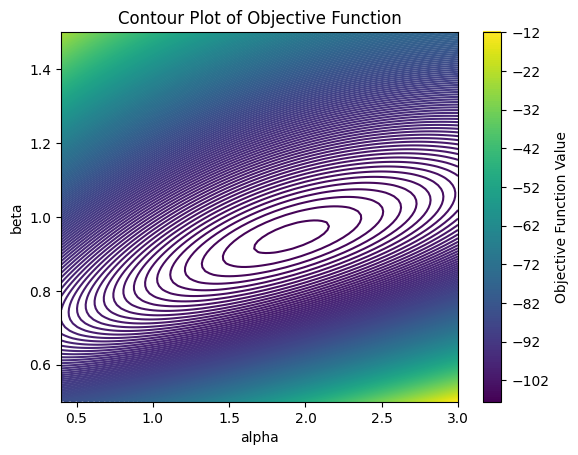

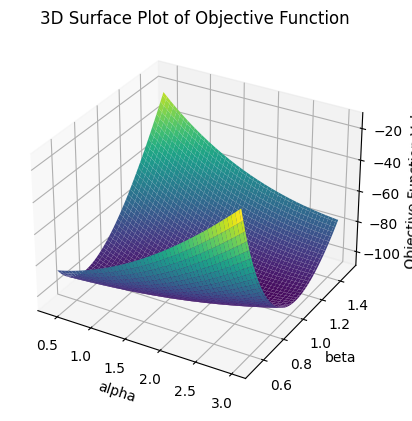

In [2]:

# 新的目標函數定義
def new_target_function(params):
    alpha, beta = params
    log_likelihood = np.sum(np.log(alpha * beta * v**(beta-1) * np.exp(-alpha * v**beta)) - np.log(1 - np.exp(-alpha * u**beta)))
    return -log_likelihood  # 使用負的對數似然進行最小化

# 初始猜測值
initial_guess = [1.0, 1.0]

# 設定新的參數範圍
alpha_range = np.linspace(0.4, 3, 100)
beta_range = np.linspace(0.5, 1.5, 100)

# 生成參數範圍
alpha_values, beta_values = np.meshgrid(alpha_range, beta_range)

# 計算目標函數值
z_values = np.array([new_target_function([alpha, beta]) for alpha, beta in zip(alpha_values.flatten(), beta_values.flatten())])
z_values = z_values.reshape(alpha_values.shape)

# 繪製等高線圖
plt.contour(alpha_values, beta_values, z_values, levels=200, cmap='viridis')
plt.xlabel('alpha')
plt.ylabel('beta')
plt.title('Contour Plot of Objective Function')
plt.colorbar(label='Objective Function Value')
plt.show()

# 繪製立體圖
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(alpha_values, beta_values, z_values, cmap='viridis')
ax.set_xlabel('alpha')
ax.set_ylabel('beta')
ax.set_zlabel('Objective Function Value')
ax.set_title('3D Surface Plot of Objective Function')
plt.show()


結果:
1. 因為在目標函數 new_target_function 中使用了負的對數似然函數，所以最小化目標函數實際上等於最大化對數似然函數。在這種情況下，需要找到目標函數的最小值。在等高線圖和立體圖中，最小值的位置對應於對數似然函數的最大值，這就是題目要找的最大似然估計的參數值。 
2. 透過等高線圖隱約可以看出最大似然估計的參數值的位置，就位在等高線中心點紫色橢圓中(在圖裡是最小值大約等於-102)，大約是在 $\alpha=1.9$, $\beta=0.9$的位子。
3. 透過立體圖隱約也可以看出最大似然估計的參數值的位置，位在$\alpha=1.5-2.5$, $\beta=1$的區間，但還是等高線圖比較好判斷最大值。

### 四.部署 minimize 的各項停止條件及計算，獲取一組更明確的數據，並用紅色點標記了最小化目標函數值的位置


程式碼解釋:

1. new_target_function 函數:
這是一個新的目標函數，其中使用了提供的數據 u 和 v。這個函數的目的是最大化對數似然函數的值，因此對其取了負值，使之成為一個最小化問題。對數似然函數的計算是基於某一統計模型，根據提供的數據進行概率估計。
2. minimize 函數的使用:
minimize 函數是用於最小化目標函數的SciPy庫中的一個工具。在這裡，它被用來最大概似估計模型的參數 alpha 和 beta。使用了 L-BFGS-B 優化方法，這是一種有界優化方法，其中 bounds 參數指定了 alpha 和 beta 的範圍限制，確保它們不會取到非法的值（如負值）。

3. 標記最小值位置:
在這些圖形中，紅色點標記了最小化目標函數值的位置，即 alpha_mle 和 beta_mle 的值。這些值是 minimize 函數估計出的最大概似估計參數。

總的來說，這段程式碼旨在通過最小化對數似然函數的方式，以 alpha 和 beta 作為模型的參數，對給定的數據進行最大概似估計。視覺化的圖形則有助於理解目標函數在參數空間中的變化趨勢，以及最終的參數估計位置。

MLE估計的alpha為: 1.9073491793659345
MLE估計的beta為: 0.9464388396380767


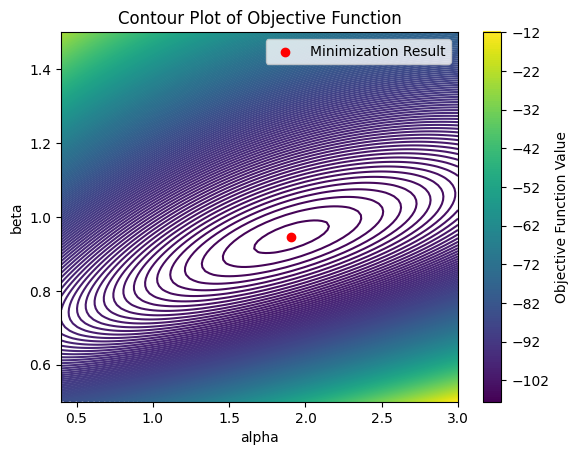

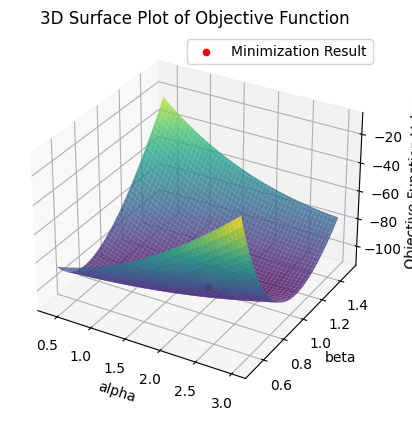

In [3]:

# 新的目標函數定義
def new_target_function(params):
    alpha, beta = params
    log_likelihood = np.sum(np.log(alpha * beta * v**(beta-1) * np.exp(-alpha * v**beta)) - np.log(1 - np.exp(-alpha * u**beta)))
    return -log_likelihood  # 使用負的對數似然進行最小化

# 初始猜測值
initial_guess = [1.0, 1.0]

# 進行最大概似估計
result = minimize(new_target_function, initial_guess, method='L-BFGS-B', bounds=[(0, None), (0, None)])

# 提取估計出的參數值
alpha_mle, beta_mle = result.x
min_objective_value = result.fun  # 最小化的目標函數值

# 顯示結果
print(f"MLE估計的alpha為: {alpha_mle}")
print(f"MLE估計的beta為: {beta_mle}")

# 設定新的參數範圍
alpha_range = np.linspace(0.4, 3, 100)
beta_range = np.linspace(0.5, 1.5, 100)

# 生成參數範圍
alpha_values, beta_values = np.meshgrid(alpha_range, beta_range)

# 計算目標函數值
z_values = np.array([new_target_function([alpha, beta]) for alpha, beta in zip(alpha_values.flatten(), beta_values.flatten())])
z_values = z_values.reshape(alpha_values.shape)

# 繪製等高線圖
contour_plot = plt.contour(alpha_values, beta_values, z_values, levels=200, cmap='viridis')
plt.xlabel('alpha')
plt.ylabel('beta')
plt.title('Contour Plot of Objective Function')
plt.colorbar(label='Objective Function Value')

# 標記最小值位置
plt.scatter(alpha_mle, beta_mle, color='red', label='Minimization Result')
plt.legend()

# 繪製立體圖
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(alpha_values, beta_values, z_values, cmap='viridis', alpha=0.8)
ax.set_xlabel('alpha')
ax.set_ylabel('beta')
ax.set_zlabel('Objective Function Value')
ax.set_title('3D Surface Plot of Objective Function')

# 標記最小值位置
ax.scatter(alpha_mle, beta_mle, min_objective_value, color='red', label='Minimization Result')
ax.legend()

plt.show()

結果:<br>
現在可以明確看到最大值就位在紅色點標記的地方(在圖裡是最小值)，<br>MLE估計的alpha為: 1.9073491793659345，MLE估計的beta為: 0.9464388396380767，<br>也證明前面的等高線圖和立體圖是正確的。